In [17]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [19]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = './data/data_without_na_01.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 28)

In [7]:
def count(s):
    return len(s)

In [8]:
df['术前诊断_count'] = df['术前诊断'].apply(count)
df['实施手术_count'] = df['实施手术'].apply(count)

In [15]:
def text_describe(df):
    desc = {}
    df_group = df.filter(['手术ID','病区','术前诊断_count','实施手术_count'])
    for department,group_by_department in df_group.groupby('病区'):
        desc[department] = {}
        for item in ['术前诊断','实施手术']:
            desc[department][item] = {}
            desc[department][item]['max'] = group_by_department[item+'_count'].max()
            desc[department][item]['avg'] = group_by_department[item+'_count'].mean().round(1)
            desc[department][item]['min'] = group_by_department[item+'_count'].min()
    return desc

In [16]:
pprint(text_describe(df))

{'口腔科病区': {'实施手术': {'avg': 19.8, 'max': 76, 'min': 5},
           '术前诊断': {'avg': 9.3, 'max': 32, 'min': 2}},
 '妇产科病区': {'实施手术': {'avg': 15.5, 'max': 73, 'min': 3},
           '术前诊断': {'avg': 18.4, 'max': 100, 'min': 2}},
 '心血管病区': {'实施手术': {'avg': 18.0, 'max': 45, 'min': 4},
           '术前诊断': {'avg': 16.3, 'max': 120, 'min': 2}},
 '整形外科病区': {'实施手术': {'avg': 14.4, 'max': 25, 'min': 6},
            '术前诊断': {'avg': 9.0, 'max': 20, 'min': 3}},
 '普通外科病区': {'实施手术': {'avg': 13.7, 'max': 51, 'min': 3},
            '术前诊断': {'avg': 8.7, 'max': 71, 'min': 1}},
 '普通胸外科病区': {'实施手术': {'avg': 22.8, 'max': 44, 'min': 4},
             '术前诊断': {'avg': 6.5, 'max': 21, 'min': 2}},
 '泌尿外科中心病区': {'实施手术': {'avg': 17.3, 'max': 49, 'min': 5},
              '术前诊断': {'avg': 10.5, 'max': 86, 'min': 2}},
 '眼科病区': {'实施手术': {'avg': 21.4, 'max': 41, 'min': 7},
          '术前诊断': {'avg': 18.5, 'max': 45, 'min': 6}},
 '神经内科病区': {'实施手术': {'avg': 13.5, 'max': 28, 'min': 3},
            '术前诊断': {'avg': 15.9, 'max': 120, 

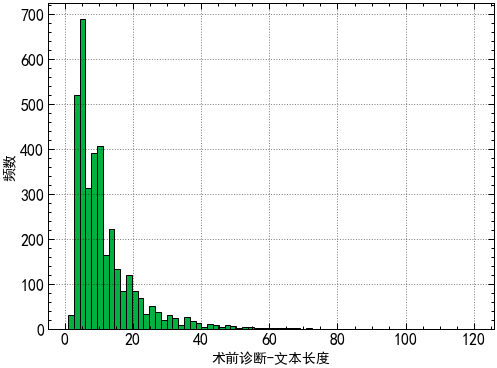

In [26]:
diagnose_count = df['术前诊断_count']
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(diagnose_count, bins=70, density=False,edgecolor="black",color='#00b141')
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('术前诊断-文本长度',fontdict={'size':14})

    plt.show()

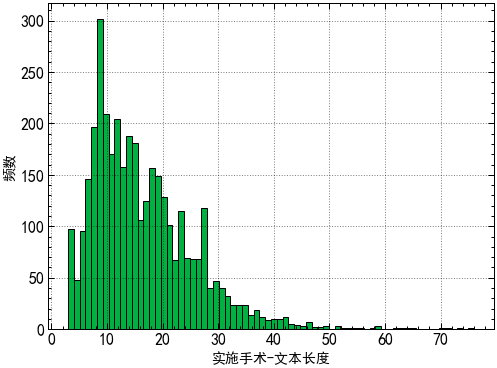

In [27]:
operation_count = df['实施手术_count']
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(operation_count, bins=70, density=False,edgecolor="black",color='#00b141')
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('实施手术-文本长度',fontdict={'size':14})

    plt.show()